In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from math import pi

In [4]:
# ml models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [6]:
df_train = pd.read_csv('train_loan.csv')
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_train_copy = df_train.copy()

In [10]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

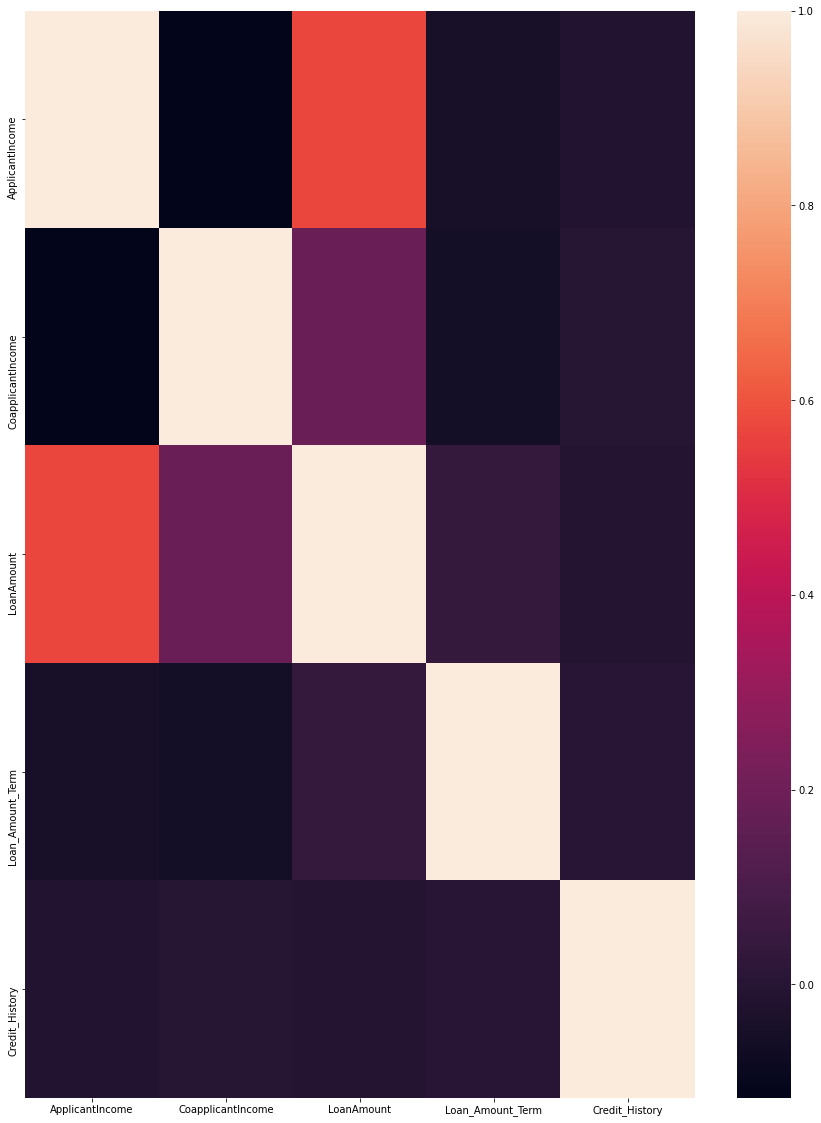

In [13]:
dims =(15,20)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax, data=df_train.corr())

In [14]:
corr_val = df_train.corr()

corr_new = corr_val.unstack()
corr_new = corr_new.sort_values()

pd.set_option('display.max_rows', None)
print(corr_new[corr_new > 0])
print(corr_new[corr_new < 0])

Loan_Amount_Term   Credit_History       0.001470
Credit_History     Loan_Amount_Term     0.001470
LoanAmount         Loan_Amount_Term     0.039447
Loan_Amount_Term   LoanAmount           0.039447
CoapplicantIncome  LoanAmount           0.188619
LoanAmount         CoapplicantIncome    0.188619
                   ApplicantIncome      0.570909
ApplicantIncome    LoanAmount           0.570909
                   ApplicantIncome      1.000000
LoanAmount         LoanAmount           1.000000
CoapplicantIncome  CoapplicantIncome    1.000000
Loan_Amount_Term   Loan_Amount_Term     1.000000
Credit_History     Credit_History       1.000000
dtype: float64
ApplicantIncome    CoapplicantIncome   -0.116605
CoapplicantIncome  ApplicantIncome     -0.116605
                   Loan_Amount_Term    -0.059878
Loan_Amount_Term   CoapplicantIncome   -0.059878
                   ApplicantIncome     -0.045306
ApplicantIncome    Loan_Amount_Term    -0.045306
Credit_History     ApplicantIncome     -0.014715
Appli

Preprocessing 

In [15]:
df_train['Self_Employed'].fillna('No', inplace=True)
df_train['Self_Employed'].isna().values.any()

False

In [16]:
df_median = df_train['LoanAmount'].median()
df_train['LoanAmount'].fillna((df_median), inplace=True)
df_train['LoanAmount'].isna().values.any()

False

In [17]:
new_median = df_train['Loan_Amount_Term'].median()
df_train['Loan_Amount_Term'].fillna((new_median), inplace=True)
df_train['Loan_Amount_Term'].isna().values.any()

False

In [18]:
df_train['Credit_History'].fillna(method='ffill', inplace=True)
df_train['Credit_History'].isna().values.any()

False

In [19]:
df_train['Married'].fillna('Yes', inplace=True)
df_train['Married'].isna().values.any()

False

In [20]:
df_train['Gender'].mode()

0    Male
dtype: object

In [21]:
df_train['Gender'].fillna('Male', inplace=True)
df_train['Gender'].isna().values.any()

False

In [22]:
df_train['Dependents'].mode()

0    0
dtype: object

In [23]:
df_train['Dependents'].fillna(0, inplace=True)
df_train['Dependents'].isna().values.any()

False

In [24]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df_train.duplicated().values.any()

False

In [26]:
#df_train.to_csv('new_loan_prediction.csv', index=False)

Clean Test data

In [29]:
df_test = pd.read_csv('test_loan.csv')
df_test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [30]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
df_test['Self_Employed'].fillna('No', inplace=True)
df_test['Self_Employed'].isna().values.any()

False

In [32]:
df_median_test = df_test['LoanAmount'].median()
df_test['LoanAmount'].fillna((df_median_test), inplace=True)
df_test['LoanAmount'].isna().values.any()

False

In [33]:
new_median_test = df_test['Loan_Amount_Term'].median()
df_test['Loan_Amount_Term'].fillna((new_median_test), inplace=True)
df_test['Loan_Amount_Term'].isna().values.any()

False

In [34]:
df_test['Credit_History'].fillna(method='ffill', inplace=True)
df_test['Credit_History'].isna().values.any()

False

In [35]:
df_test['Gender'].mode()

0    Male
dtype: object

In [36]:
df_test['Gender'].fillna('Male', inplace=True)
df_test['Gender'].isna().values.any()

False

In [39]:
df_test['Dependents'].mode()

0    0
dtype: object

In [40]:
df_test['Dependents'].fillna(0, inplace=True)
df_test['Dependents'].isna().values.any()

False

In [41]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [62]:
df_test.to_csv('new_test_loan_prediction.csv', index=False)

Main ML Models

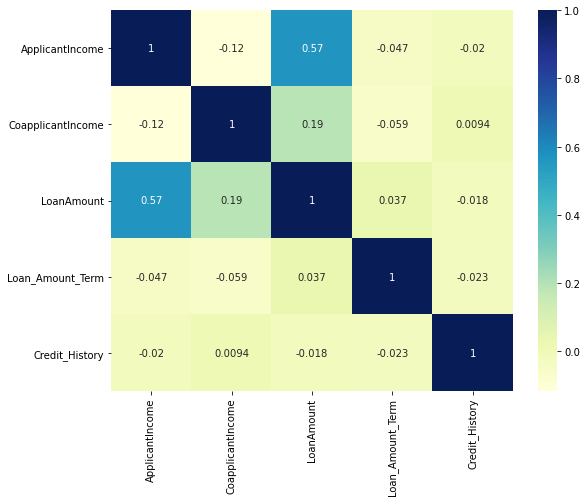

In [43]:
fig, ax = plt.subplots(figsize=(9, 7))
corr_num = df_train.corr()
  
plot_corr = sns.heatmap(corr_num, cmap="YlGnBu", annot=True)
  
plt.show()

Transform Categorical features 

In [46]:
train_feat = df_train.select_dtypes(include = "object").columns
train_feat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in train_feat:
    df_train[feature] = le.fit_transform(df_train[feature].astype(str))

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [50]:
#test data
test_feat = df_test.select_dtypes(include='object').columns
test_feat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [51]:
for feature in test_feat:
    df_test[feature] = le.fit_transform(df_test[feature].astype(str))

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int32  
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(7), int64(2)
memory usage: 24.5 KB


better correlation view

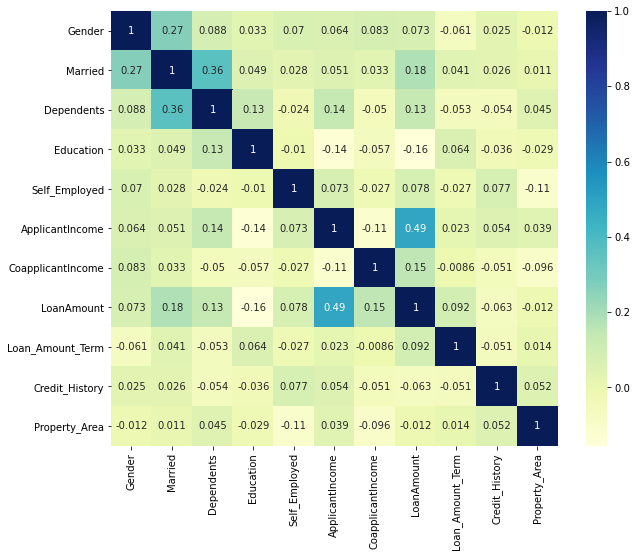

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
new_corr = df_test.iloc[:,1:].corr() 
sns.heatmap(new_corr, cmap="YlGnBu", annot=True)
plt.show()

Our target prediction is loan status so we drop it from the train data

In [53]:
data = df_train.iloc[:,1:].drop('Loan_Status', axis=1)

In [54]:
target = df_train['Loan_Status']

our split is 70% train size and 30% test size 

In [55]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.30, random_state=0)

RF Model

In [56]:
class_rf = RandomForestClassifier(n_estimators=100)
class_rf.fit(train_x, train_y)
ypred_rf = class_rf.predict(test_x)

In [57]:
print(classification_report(test_y, ypred_rf))
print("Accuracy:", accuracy_score(ypred_rf, test_y))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56        51
           1       0.82      0.90      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.70      0.71       185
weighted avg       0.78      0.79      0.78       185

Accuracy: 0.7891891891891892


Logit Regression Model

In [58]:
class_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
class_lr.fit(train_x, train_y)
ypred_lr = class_lr.predict(test_x)


In [59]:
print(classification_report(test_y, ypred_lr))
print("Accuracy:", accuracy_score(ypred_lr, test_y))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        51
           1       0.83      0.98      0.90       134

    accuracy                           0.84       185
   macro avg       0.86      0.73      0.77       185
weighted avg       0.85      0.84      0.83       185

Accuracy: 0.8432432432432433


DT model

In [60]:
class_dt = DecisionTreeClassifier()
class_dt.fit(train_x, train_y)
ypred_dt = class_dt.predict(test_x)


In [61]:
print(classification_report(test_y, ypred_dt))
print("Accuracy:", accuracy_score(ypred_dt, test_y))

              precision    recall  f1-score   support

           0       0.58      0.57      0.57        51
           1       0.84      0.84      0.84       134

    accuracy                           0.77       185
   macro avg       0.71      0.71      0.71       185
weighted avg       0.77      0.77      0.77       185

Accuracy: 0.7675675675675676


Best model is logistic regression classifier